# Exploring CoRe database

In [411]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import re
import sys
sys.path.append('../src/utils/')
import utils
from utils import get_run_filenames, load_index, load_metadata
sys.path.append('../src/')
from HDF5 import MyHDF5
from eos import TabulatedEOS, PolytropicEOS

params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

## General TODO

- Check how to get EOS files and read from them

## Preparation

In [412]:
INDEX = load_index()
# As an example, show the first entry of the index
print(INDEX["BAM_0001"])

{'database_key': 'BAM:0001', 'available_runs': 'R01, R02, R03, R04', 'simulation_name': '2B_1.350_1.350_0.00_0.00_0.038', 'binary_type': 'BNS', 'reference_bibkeys': 'Bernuzzi:2014owa', 'id_code': 'LORENE', 'id_type': 'Irrotational', 'id_mass': '2.699952e+00', 'id_rest_mass': '3.050133e+00', 'id_mass_ratio': '1.000000e+00', 'id_ADM_mass': '2.677624e+00', 'id_ADM_angularmomentum': '7.662564e+00', 'id_gw_frequency_Hz': '4.545056e+02', 'id_gw_frequency_Momega22': '3.797735e-02', 'id_eos': '2B', 'id_kappa2T': '2.376117e+01', 'id_Lambda': '1.267263e+02', 'id_eccentricity': '7.092541e-03', 'id_mass_starA': '1.349976e+00', 'id_rest_mass_starA': '1.525067e+00', 'id_spin_starA': '0, 0, 0', 'id_LoveNum_kell_starA': '6.899000e-02, 1.746000e-02, 5.990000e-03', 'id_Lambdaell_starA': '1.267263e+02, 1.524837e+02, 1.776546e+02', 'id_mass_starB': '1.349976e+00', 'id_rest_mass_starB': '1.525067e+00', 'id_spin_starB': '0, 0, 0', 'id_LoveNum_kell_starB': '6.899000e-02, 1.746000e-02, 5.990000e-03', 'id_Lamb

## Getting metadata of a run

In [413]:
test_run_name = "BAM_0001"
INDEX[test_run_name]
hdf5_filename, metadata_filename = get_run_filenames(INDEX, test_run_name)
metadata = load_metadata(metadata_filename)
print(len(metadata))
metadata

available_runs:  ['R01', 'R02', 'R03', 'R04']
Chosen run: R04
49


{'database_key': 'BAM:0001:R04',
 'simulation_name': '2B_1.350_1.350_0.00_0.00_0.038_0.186',
 'binary_type': 'BNS',
 'reference_bibkeys': 'Bernuzzi:2014kca',
 'id_code': 'LORENE',
 'id_type': 'Irrotational',
 'id_mass': '2.699952e+00',
 'id_rest_mass': '3.050133e+00',
 'id_mass_ratio': '1.000000e+00',
 'id_ADM_mass': '2.677624e+00',
 'id_ADM_angularmomentum': '7.662564e+00',
 'id_gw_frequency_Hz': '4.545056e+02',
 'id_gw_frequency_Momega22': '3.797735e-02',
 'id_eos': '2B',
 'id_kappa2T': '2.376117e+01',
 'id_Lambda': '1.267263e+02',
 'id_eccentricity': '7.102151e-03',
 'id_mass_starA': '1.349976e+00',
 'id_rest_mass_starA': '1.525067e+00',
 'id_spin_starA': '0, 0, 0',
 'id_LoveNum_kell_starA': '6.899000e-02, 1.746000e-02, 5.990000e-03',
 'id_Lambdaell_starA': '1.267263e+02, 1.524837e+02, 1.776546e+02',
 'id_mass_starB': '1.349976e+00',
 'id_rest_mass_starB': '1.525067e+00',
 'id_spin_starB': '0, 0, 0',
 'id_LoveNum_kell_starB': '6.899000e-02, 1.746000e-02, 5.990000e-03',
 'id_Lambdael

## Example: strain of HDF5 file

In [414]:
hdf5 = MyHDF5(hdf5_filename)
print(hdf5.l, hdf5.m)
print(hdf5.strain_filenames)

['energy', 'horizon', 'rh_22', 'rpsi4_22']
{'energy': ['EJ_r00650.txt', 'EJ_r00700.txt', 'EJ_r00750.txt', 'EJ_r00800.txt', 'EJ_r00850.txt', 'EJ_r00900.txt'], 'horizon': ['horizon_0'], 'rh_22': ['Rh_l2_m2_r00650.txt', 'Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt'], 'rpsi4_22': ['Rpsi4_l2_m2_r00650.txt', 'Rpsi4_l2_m2_r00700.txt', 'Rpsi4_l2_m2_r00750.txt', 'Rpsi4_l2_m2_r00800.txt', 'Rpsi4_l2_m2_r00850.txt', 'Rpsi4_l2_m2_r00900.txt']}
Reading data OK
rh_22
2 2
['Rh_l2_m2_r00650.txt', 'Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt']


No radius specified or radius not in data, taking largest radius


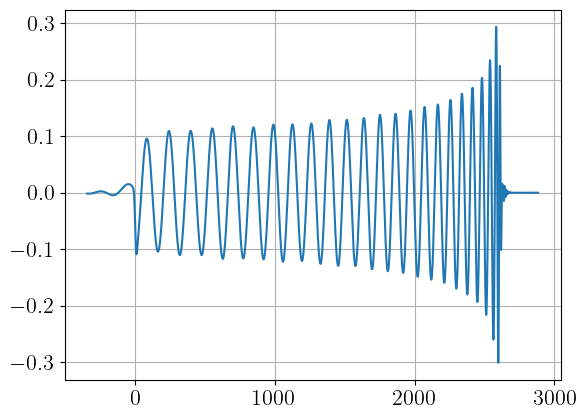

In [415]:
t, h = hdf5.get_h()
plt.plot(t, h.real)
plt.show()

## Equations of state

In [416]:
eos_dir = "/Users/Woute029/Documents/Code/CoRe_DB2/eos/"

### LS220

In [417]:
example_eos_file = f"{eos_dir}ls220/" + "LS_220_01-Jul-2014.h5" # Second part: which to choose?
eos = TabulatedEOS(example_eos_file)
eos.eos_data.keys()
print(f"pointsrho: {eos.pointsrho}, pointstemp: {eos.pointstemp}, pointsye: {eos.pointsye}")
print(eos.all_keys)

pointsrho: 223, pointstemp: 136, pointsye: 50
['cs2', 'density', 'depsdT_rho', 'dpdeps_rhoye', 'dpdrho_epsye', 'emissionRatesQloc_nua', 'emissionRatesQloc_nue', 'emissionRatesQloc_nux', 'emissionRatesRloc_nua', 'emissionRatesRloc_nue', 'emissionRatesRloc_nux', 'entropy', 'internalEnergy', 'kappa_abs_nua', 'kappa_abs_nue', 'kappa_abs_nux', 'pointsrho', 'pointstemp', 'pointsye', 'pressure', 'q_rho_ov_zt2_fermi_1_nua', 'q_rho_ov_zt2_fermi_1_nue', 'q_rho_ov_zt2_fermi_1_nux', 'r_rho_ov_zt_fermi_0_nua', 'r_rho_ov_zt_fermi_0_nue', 'r_rho_ov_zt_fermi_0_nux', 'temperature', 'ye', 'zeta_nua', 'zeta_nue', 'zeta_nux']


### BHBLP

In [418]:
example_eos_file = f"{eos_dir}bhblp/" + "BHB_lp_comp_14-Jul-2016.h5"
eos = TabulatedEOS(example_eos_file, extraction_keys=['density', 'temperature', 'ye'])
eos.eos_data.keys()
print(f"pointsrho: {eos.pointsrho}, pointstemp: {eos.pointstemp}, pointsye: {eos.pointsye}")
print(eos.all_keys)

pointsrho: 234, pointstemp: 180, pointsye: 60
['Abar', 'X3he', 'X4li', 'XL', 'Xa', 'Xd', 'Xh', 'Xn', 'Xp', 'Zbar', 'density', 'mass_factor', 'temperature', 'version', 'ye']


### SFHo

In [419]:
example_eos_file = f"{eos_dir}sfho/" + "SFHo_hydro_29-Jun-2015.h5"
eos = TabulatedEOS(example_eos_file)
eos.eos_data.keys()
print(f"pointsrho: {eos.pointsrho}, pointstemp: {eos.pointstemp}, pointsye: {eos.pointsye}")
print(eos.all_keys)

pointsrho: 220, pointstemp: 180, pointsye: 60
['cs2', 'density', 'depsdT_rho', 'dpdeps_rhoye', 'dpdrho_epsye', 'entropy', 'internalEnergy', 'mass_factor', 'pressure', 'temperature', 'version', 'ye']


### DD2

In [420]:
example_eos_file = f"{eos_dir}dd2/" + "DD2_DD2_weak_30-Mar-2015.h5"
eos = TabulatedEOS(example_eos_file)
eos.eos_data.keys()
print(f"pointsrho: {eos.pointsrho}, pointstemp: {eos.pointstemp}, pointsye: {eos.pointsye}")
print(eos.all_keys)

pointsrho: 234, pointstemp: 180, pointsye: 60
['Abar', 'Xa', 'Xh', 'Xn', 'Xp', 'Zbar', 'density', 'mass_factor', 'mu_e', 'mu_n', 'mu_p', 'temperature', 'version', 'ye']


### Polytropic EOS

In [421]:
eos_name = "2B"
eos_path = f"/Users/Woute029/Documents/Code/CoRe_DB2/eos/polytropic/{eos_name}.txt"

In [422]:
polytropic = PolytropicEOS("2B")

rho_th ['=', '[3.4936e-04,', '8.1147e-04,', '1.6191e-03]']
a ['=', '[1.2025e-02,', '1.2025e-02,', '1.2025e-02]']
e ['=', '[8.3267e-04,', '1.7294e-03]']
K ['=', '[8.9493e-02,', '4.2802e+04,', '4.2802e+04,', '4.2802e+04]']
Gamma ['=', '[1.3569e+00,', '3.0000e+00,', '3.0000e+00,', '3.0000e+00]']


In [423]:
polytropic.parameters

{'rho_th': [0.00034936, 0.00081147, 0.0016191],
 'a': [0, 0.012025, 0.012025, 0.012025],
 'e': [0.00083267, 0.0017294],
 'K': [0.089493, 42802.0, 42802.0, 42802.0],
 'Gamma': [1.3569, 3.0, 3.0, 3.0]}

We have loaded all the polytropic EOS in the EOS file:

In [424]:
from eos import POLYTROPIC_EOS_DICT
print(POLYTROPIC_EOS_DICT.keys())
example_eos = POLYTROPIC_EOS_DICT["2H"]
print(example_eos.parameters)

dict_keys(['2B', '2H', 'ALF2', 'ENG', 'H4', 'MPA1', 'MS1', 'MS1b', 'SLy'])
{'rho_th': [0.00011383, 0.00081147, 0.0016191], 'a': [0, 0.0080585, 0.0080585, 0.0080585], 'e': [0.0008902, 0.0022055], 'K': [0.089493, 270170.0, 270170.0, 270170.0], 'Gamma': [1.3569, 3.0, 3.0, 3.0]}


In [425]:
for key, value in example_eos.parameters.items():
    print(key, value)
    print(len(value))

rho_th [0.00011383, 0.00081147, 0.0016191]
3
a [0, 0.0080585, 0.0080585, 0.0080585]
4
e [0.0008902, 0.0022055]
2
K [0.089493, 270170.0, 270170.0, 270170.0]
4
Gamma [1.3569, 3.0, 3.0, 3.0]
4


In [426]:
rho, pressure = example_eos.get_pressure()

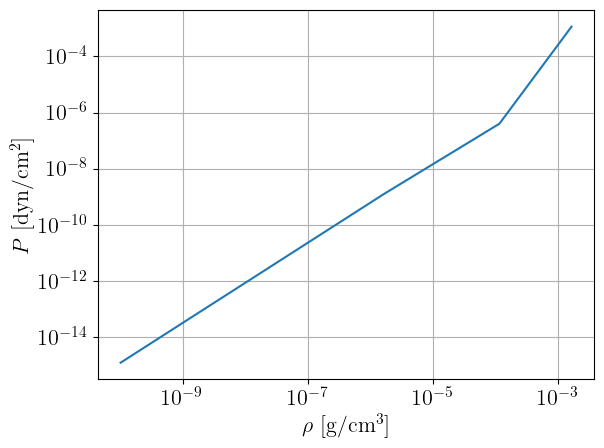

In [429]:
plt.plot(rho, pressure)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\rho$ [g/cm$^3$]") # TODO check units
plt.ylabel(r"$P$ [dyn/cm$^2$]") # TODO check units
plt.show()